<a href="https://colab.research.google.com/github/franciscosalido/AIML/blob/master/AllLife_Credit_Card_Customer_Segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **AllLife Credit Card Customer Segmentation **

**Background:** 
AllLife Bank wants to focus on its credit card customer base in the next financial year. They have been advised by their marketing research team, that the penetration in the market can be improved. Based on this input, the Marketing team proposes to run personalised campaigns to target new customers as well as upsell to existing customers. Another insight from the market research was that the customers perceive the support services of the back poorly. Based on this, the Operations team wants to upgrade the service delivery model, to ensure that customers queries are resolved faster. Head of Marketing and Head of Delivery both decide to reach out to the Data Science team for help.

**Objective:** To identify different segments in the existing customer based on their spending patterns as well as past interaction with the bank. 

**Key Questions:** 
1.	How many different segments of customers are there? 
2.	How are these segments different from each other? 
3.	What are your recommendations to the bank on how to better market to and service these customers? 

**Data Description: **

> Data is of various customers of a bank with their credit limit, the total number of credit cards the customer has, and different channels through which customer has contacted the bank for any queries, different channels include visiting the bank, online and through a call centre.

**Steps to follow: **
 
1.	Perform univariate analysis on the data to better understand the variables at your disposal and to get an idea about the no of clusters. Perform EDA, create visualizations to explore data. (10 marks) 
2.	Properly comment on the codes, provide explanations of the steps taken in the notebook and conclude your insights from the graphs. (5 marks) 
3.	Execute K-means clustering use elbow plot and analyse clusters using boxplot (10 marks) 
4.	Execute hierarchical clustering (with different linkages) with the help of dendrogram and cophenetic coeff. Analyse clusters formed using boxplot (15 marks) 
5.	Calculate average silhouette score for both methods. (5 marks) 
6.	Compare K-means clusters with Hierarchical clusters. (5 marks) 
7.	Analysis the clusters formed, tell us how is one cluster different from another and answer all the key questions. (10 marks) 



## 0 Introduction

In [1]:
#!/usr/bin/python

#### 0.a. Import the libraries

In [2]:
# Supress "Future Warnings"
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [3]:
# import structures and common data analysis libraries
import io
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# automaticly render any figure in a notebook made with this library
%matplotlib inline

In [4]:
# import statistical analysis libraries

import scipy.stats as stats
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms
from statsmodels.compat import lzip
from statsmodels.graphics.tsaplots import plot_acf
from scipy.spatial.distance import cdist
from scipy.cluster.hierarchy import dendrogram, linkage

from __future__ import print_function

In [5]:
# import machine learning libraries

from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler, normalize, MinMaxScaler, RobustScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering 
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import cluster
from sklearn import tree
from sklearn import metrics
from sklearn.metrics import silhouette_score, silhouette_samples

#### 0.b. Import the dataset

In [6]:
# Mount the google drive and set the path to the dataset
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [7]:
root_path = '/content/drive/My\ Drive/AIML/alllife_credit_card_customer_segmentation/'  #set a dir to the project folder
!ls /content/drive/My\ Drive/AIML/alllife_credit_card_customer_segmentation/ #change dir to the project folder

'Clustering Project- Problem Statement.pdf'  'Credit Card Customer Data.xlsx'


In [8]:
data = pd.read_excel(r'/content/drive/My Drive/AIML/alllife_credit_card_customer_segmentation/Credit Card Customer Data.xlsx')

print("Columns:")
print(*data.columns)

Columns:
Sl_No Customer Key Avg_Credit_Limit Total_Credit_Cards Total_visits_bank Total_visits_online Total_calls_made


#### 0.c Housekipping

In [9]:
np.set_printoptions(precision=3, suppress=True) # Make numpy values easier to read.
pd.set_option("display.precision", 3) # Use 3 decimal places in output display
pd.set_option("display.expand_frame_repr", False) # Don't wrap repr(DataFrame) across additional lines
pd.set_option("display.max_rows", 25) # Set max rows displayed in output to 25
sns.set(style="darkgrid") #plot any seaborn plot with a gray background

#### 0.d Check Datatype

In [10]:
data.head() # check the name of the columns and the first 5 rows

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1,87073,100000,2,1,1,0
1,2,38414,50000,3,0,10,9
2,3,17341,50000,7,1,3,4
3,4,40496,30000,5,1,1,4
4,5,47437,100000,6,0,12,3


In [11]:
data.info(); # check some information about the variables (columns)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660 entries, 0 to 659
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Sl_No                660 non-null    int64
 1   Customer Key         660 non-null    int64
 2   Avg_Credit_Limit     660 non-null    int64
 3   Total_Credit_Cards   660 non-null    int64
 4   Total_visits_bank    660 non-null    int64
 5   Total_visits_online  660 non-null    int64
 6   Total_calls_made     660 non-null    int64
dtypes: int64(7)
memory usage: 36.2 KB


#### 0.e Statistical Summary

In [12]:
# Creating a copy of the Data for manipulation
df = data.copy()

In [13]:
df = df.drop(['Sl_No'], axis= 1) # drop the columns 'Sl_No'

#### 0.f Shape

In [14]:
df.shape # check the shape after droping columns

(660, 6)

#### 0.g Check for invalid values

In [15]:
df.isnull().sum() # check for null values by row

Customer Key           0
Avg_Credit_Limit       0
Total_Credit_Cards     0
Total_visits_bank      0
Total_visits_online    0
Total_calls_made       0
dtype: int64

In [16]:
df.isnull().sum().any() # check for null values in the dataframe

False

#### 0.h Data Summary and Distribution

In [17]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Customer Key,660.0,55141.444,25627.772,11265.0,33825.25,53874.5,77202.5,99843.0
Avg_Credit_Limit,660.0,34574.242,37625.488,3000.0,10000.00,18000.0,48000.0,200000.0
Total_Credit_Cards,660.0,4.706,2.168,1.0,3.00,5.0,6.0,10.0
Total_visits_bank,660.0,2.403,1.632,0.0,1.00,2.0,4.0,5.0
Total_visits_online,660.0,2.606,2.936,0.0,1.00,2.0,4.0,15.0
Total_calls_made,660.0,3.583,2.865,0.0,1.00,3.0,5.0,10.0


In [18]:
print('Cheking for Zeros values:')
print('Total_visits_bank zero values: {}'.format(df[df['Total_visits_bank'] == 0]['Total_visits_bank'].count()))
print('Total_visits_online zero values: {}'.format(df[df['Total_visits_online'] == 0]['Total_visits_online'].count()))
print('Total_calls_made zero values: {}'.format(df[df['Total_calls_made'] == 0]['Total_calls_made'].count()))

Cheking for Zeros values:
Total_visits_bank zero values: 100
Total_visits_online zero values: 144
Total_calls_made zero values: 97


## 1. Exploratory Data Analysis:

#### 1.1 Number of unique in each column?

In [19]:
df.nunique()

Customer Key           655
Avg_Credit_Limit       110
Total_Credit_Cards      10
Total_visits_bank        6
Total_visits_online     16
Total_calls_made        11
dtype: int64

### Warning: There is 5 repeated values in 'Customer Key' column

In [20]:
duplidated_df= df.duplicated(subset= 'Customer Key', keep='first')
duplidated_df.value_counts()

False    655
True       5
dtype: int64

In [21]:
duplicated_df = df[df.duplicated(['Customer Key'])]
print("Duplicate Rows based on a single column are:", duplicated_df, sep='\n')

Duplicate Rows based on a single column are:
     Customer Key  Avg_Credit_Limit  Total_Credit_Cards  Total_visits_bank  Total_visits_online  Total_calls_made
332         47437             17000                   7                  3                    1                 0
398         96929             67000                   6                  2                    2                 2
432         37252             59000                   6                  2                    1                 2
541         50706             60000                   7                  5                    2                 2
632         97935            187000                   7                  1                    7                 0


#### Drop the repeated rows based on the Avg_Credit_Limit

In [22]:
# Instead of using dropduplicated() we will use a lambda fuction to drop the lessers Avg_Credit_Limit observations

cleaned_df = df.groupby('Customer Key', group_keys=False).apply(lambda x: x.loc[x.Avg_Credit_Limit.idxmax()])

print("Duplicate Rows except first occurrence based on all columns are :")
print(cleaned_df);

Duplicate Rows except first occurrence based on all columns are :
              Customer Key  Avg_Credit_Limit  Total_Credit_Cards  Total_visits_bank  Total_visits_online  Total_calls_made
Customer Key                                                                                                              
11265                11265             51000                   7                  3                    2                 0
11398                11398             12000                   6                  5                    2                 1
11412                11412             19000                   2                  2                    3                 4
11466                11466              9000                   7                  5                    0                 0
11562                11562             38000                   4                  3                    2                 0
...                    ...               ...                 ...         

In [23]:
cleaned_df.shape

(655, 6)

In [24]:
cleaned_df.nunique()

Customer Key           655
Avg_Credit_Limit       110
Total_Credit_Cards      10
Total_visits_bank        6
Total_visits_online     16
Total_calls_made        11
dtype: int64

## 1.2 Univariate Analysis

#### 1.2.1 Average Credit Limit

In [25]:
# Avg_Credit_Limit zero caounts
a= cleaned_df['Avg_Credit_Limit'].isin([0]).sum()
print('The number of clients with zero Avg_Credit_Limit {} and percentage {:.0%}'.format(a, a / cleaned_df['Avg_Credit_Limit'].count() ))

The number of clients with zero Avg_Credit_Limit 0 and percentage 0%


##### IQR Method Classification

In [26]:
cleaned_df['Avg_Credit_Limit'].describe()

count       655.000
mean      34690.076
std       37728.591
min        3000.000
25%       10000.000
50%       18000.000
75%       48500.000
max      200000.000
Name: Avg_Credit_Limit, dtype: float64

In [27]:
# Creating a copy of the Data for Analysis and Manipulation
pdata = data.copy()

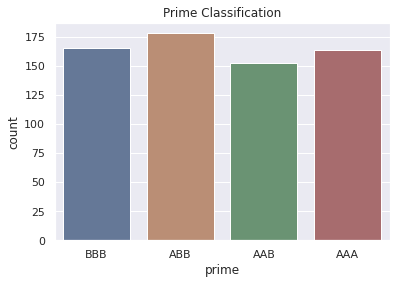

In [28]:
# Transform the numerical campaigns in a categorical variable using four bins 'BBB', 'ABB', 'AAB' and 'AAA' calls.
bins= [3000.000, 10000.000, 18000.000, 48500.000, 200000.000]         # Create 4 bins
group= ['BBB', 'ABB', 'AAB', 'AAA']                                   # Name the bins
pdata['prime']= pd.cut(pdata['Avg_Credit_Limit'], bins, labels= group ) # Converting numeric into categorical variable
sns.countplot(x= 'prime', y= None, hue= None, data= pdata, saturation=0.50).set_title('Prime Classification'); # plot the counts of ratings observations in Average Credit Limit using bars

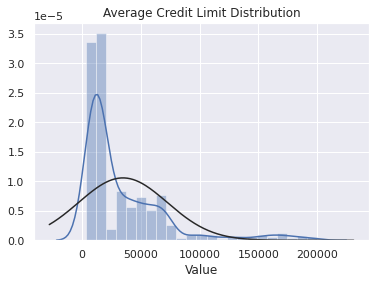

In [29]:
sns.distplot(cleaned_df['Avg_Credit_Limit'], hist= True, kde= True, rug= False, fit= stats.norm, axlabel= 'Value'). set_title('Average Credit Limit Distribution');

In [30]:
print('Average Credit Limit Skewness: {}'.format(round(cleaned_df['Avg_Credit_Limit'].skew(),2)))

Average Credit Limit Skewness: 2.19


In [31]:
print('Average Credit Limit Kurtosis: {}'.format(round(cleaned_df['Avg_Credit_Limit'].kurtosis(), 2)))

Average Credit Limit Kurtosis: 5.08


#### 1.2.2 Total Credit Cards

In [32]:
# Total_Credit_Cards zero caounts

b= cleaned_df['Total_Credit_Cards'].isin([0]).sum()
print('The number of clients with zero Total Credit Cards {} and percentage {:.0%}'.format(b, b / cleaned_df['Total_Credit_Cards'].count() ))

The number of clients with zero Total Credit Cards 0 and percentage 0%


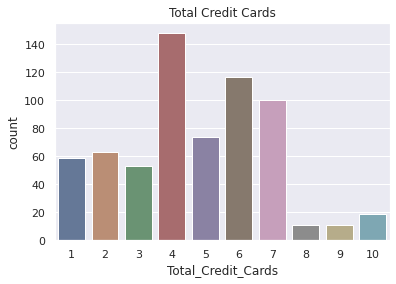

In [33]:
sns.countplot(x= 'Total_Credit_Cards', y= None, hue= None, data=cleaned_df, saturation=0.50).set_title('Total Credit Cards'); # plot the counts of ratings observations in Total_Credit_Cards using bars

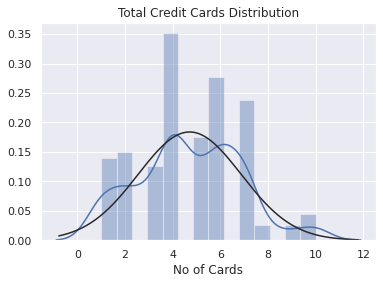

In [34]:
sns.distplot(cleaned_df['Total_Credit_Cards'], hist= True, kde= True, rug= False, fit= stats.norm, axlabel= 'No of Cards'). set_title('Total Credit Cards Distribution');

In [35]:
# check the distribution skewness
print('Total Credit Cards Skewness: {}'.format(round(cleaned_df['Total_Credit_Cards'].skew(),2)))

Total Credit Cards Skewness: 0.14


In [36]:
# check the distribution kurtosis
print('Total Credit Cards Kurtosis: {}'.format(round(cleaned_df['Total_Credit_Cards'].kurtosis(), 2)))

Total Credit Cards Kurtosis: -0.37


#### 1.2.3 Total Visits Bank

In [37]:
# Total_visits_bank zero caounts
c= cleaned_df['Total_visits_bank'].isin([0]).sum()
print('The number of clients with zero Total_visits_bank {} and percentage {:.0%}'.format(c, c / cleaned_df['Total_visits_bank'].count() ))

The number of clients with zero Total_visits_bank 99 and percentage 15%


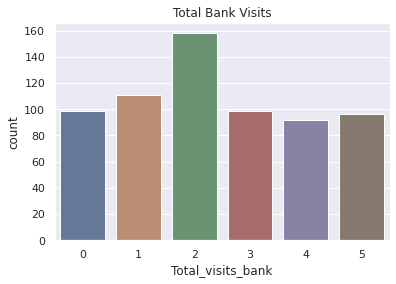

In [38]:
plt.rcParams['patch.force_edgecolor'] = True
sns.countplot(x= 'Total_visits_bank', y= None, hue= None, data=cleaned_df, saturation=0.50).set_title('Total Bank Visits'); # plot the counts of ratings observations in Total_visits_bank using bars

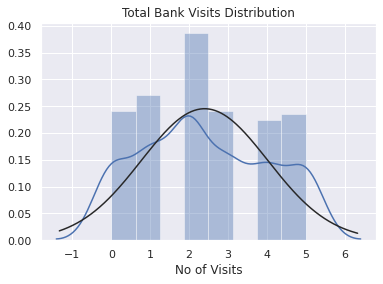

In [39]:
sns.distplot(cleaned_df['Total_visits_bank'], hist= True, kde= True, rug= False, fit= stats.norm, axlabel= 'No of Visits'). set_title('Total Bank Visits Distribution');

In [40]:
# check the distribution skewness
print('Total Visits Bank Skewness: {}'.format(round(cleaned_df['Total_visits_bank'].skew(),2)))

Total Visits Bank Skewness: 0.14


In [41]:
# check the distribution kurtosis
print('Total Visits Bank Kurtosis: {}'.format(round(cleaned_df['Total_visits_bank'].kurtosis(), 2)))

Total Visits Bank Kurtosis: -1.1


#### 1.2.4 Total Visits Online

In [42]:
# Total_visits_online zero caounts

d= cleaned_df['Total_visits_online'].isin([0]).sum()
print('The number of clients with zero Total_visits_online {} and percentage {:.0%}'.format(d, d / cleaned_df['Total_visits_online'].count() ))

The number of clients with zero Total_visits_online 142 and percentage 22%


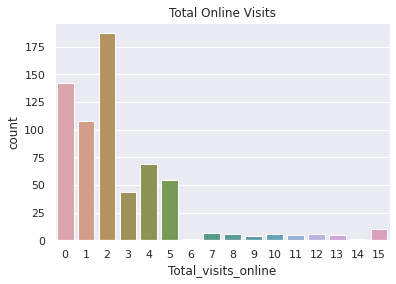

In [43]:
sns.countplot(x= 'Total_visits_online', y= None, hue= None, data=cleaned_df, saturation=0.50).set_title('Total Online Visits'); # plot the counts of ratings observations in Total_visits_online using bars

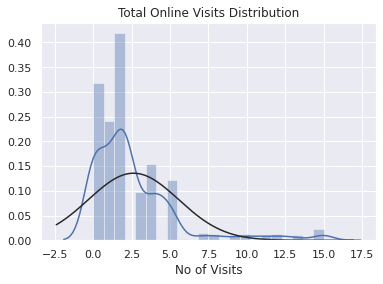

In [44]:
sns.distplot(cleaned_df['Total_visits_online'], hist= True, kde= True, rug= False, fit= stats.norm, axlabel= 'No of Visits'). set_title('Total Online Visits Distribution');

In [45]:
# check the distribution skewness
print('Total Visits Online Skewness: {}'.format(round(cleaned_df['Total_visits_online'].skew(),2)))

Total Visits Online Skewness: 2.22


In [46]:
# check the distribution kurtosis
print('Total Visits Online Kurtosis: {}'.format(round(cleaned_df['Total_visits_online'].kurtosis(), 2)))

Total Visits Online Kurtosis: 5.69


#### 1.2.5 Total Calls Made

In [47]:
# Total_calls_made zero caounts

e= cleaned_df['Total_calls_made'].isin([0]).sum()
print('The number of clients with zero Total_calls_made {} and percentage {:.0%}'.format(e, e / cleaned_df['Total_calls_made'].count() ))

The number of clients with zero Total_calls_made 95 and percentage 15%


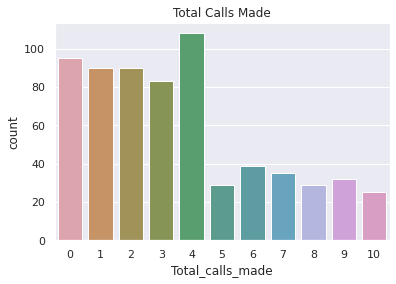

In [48]:
sns.countplot(x= 'Total_calls_made', y= None, hue= None, data=cleaned_df, saturation=0.50).set_title('Total Calls Made'); # plot the counts of ratings observations in Total_calls_made using bars

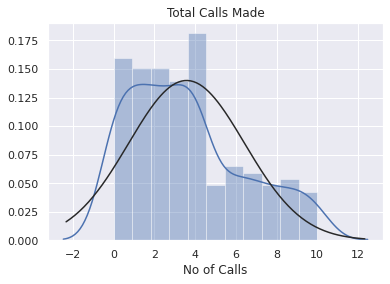

In [49]:
sns.distplot(cleaned_df['Total_calls_made'], hist= True, kde= True, rug= False, fit= stats.norm, axlabel= 'No of Calls'). set_title('Total Calls Made');

In [50]:
# check the distribution skewness
print('Total Calls Made Skewness: {}'.format(round(cleaned_df['Total_calls_made'].skew(),2)))

Total Calls Made Skewness: 0.66


In [51]:
# check the distribution kurtosis
print('Total Calls Made Kurtosis: {}'.format(round(cleaned_df['Total_calls_made'].kurtosis(), 2)))

Total Calls Made Kurtosis: -0.51


### 1.2.6 Outliers

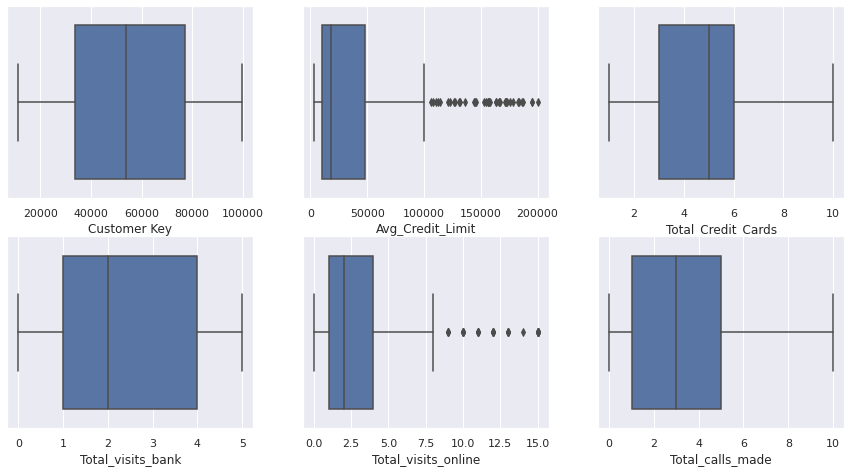

In [52]:
# Boxplots to check the presence of outliers
plt.figure(figsize=(15,12))
count = 1
for i in cleaned_df.columns:
    plt.subplot(3, 3, count)
    sns.boxplot(df[i])
    count += 1 

## 1.3 Bivariate Analysis

### 1.3.1 Pairplot

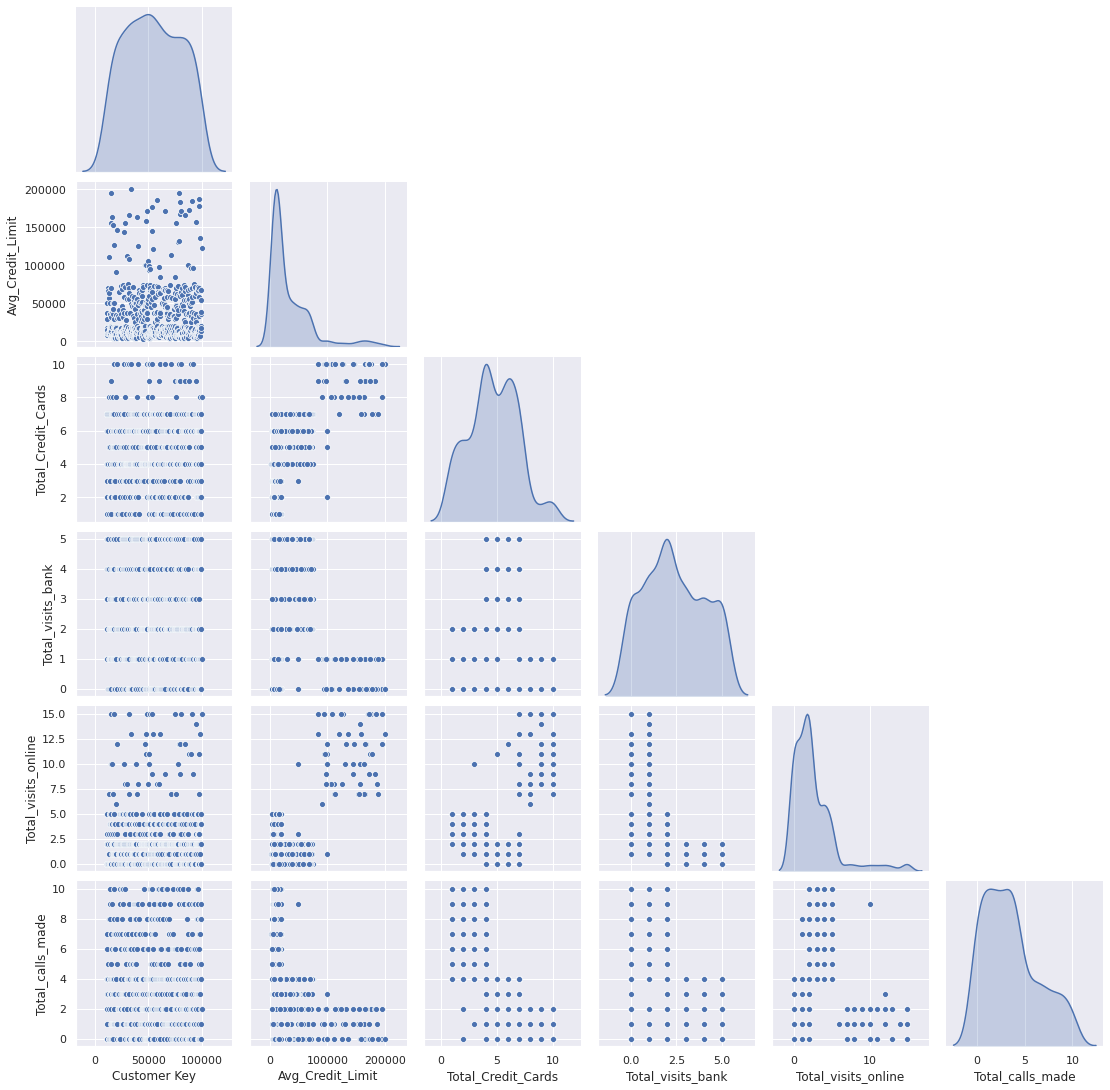

In [53]:
sns.pairplot(cleaned_df, diag_kind= 'kde', corner= True);

### 1.3.2 HeatMap

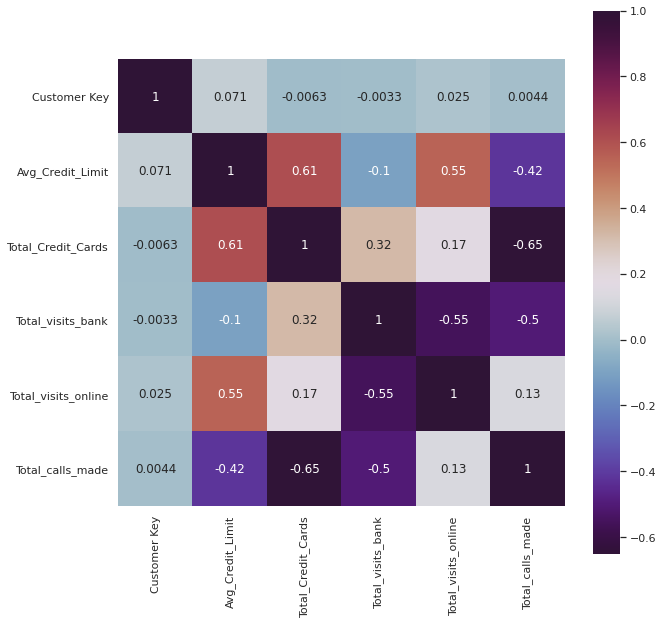

In [54]:
# Numerical Variables Heatmap (disbalanced pdays)
plt.figure(figsize=(10,10))
sns.heatmap(cleaned_df.corr(), square= True, annot= True, cmap= 'twilight_shifted');

### 1.3.3 Correlation between Avg_Credit_Limit and Total_Credit_Cards

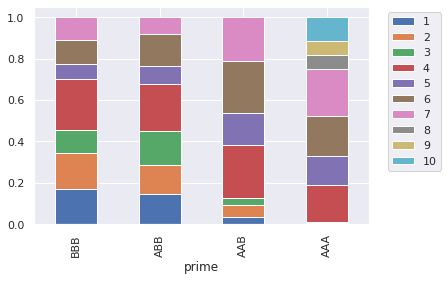

In [55]:
# Transform the numerical campaigns in a categorical variable using four bins 'BBB', 'ABB', 'AAB' and 'AAA' calls.
bins= [3000.000, 10000.000, 18000.000, 48500.000, 200000.000]            # Create 4 bins
group= ['BBB', 'ABB', 'AAB', 'AAA']                                      # Name the bins
pdata['prime']= pd.cut(pdata['Avg_Credit_Limit'], bins, labels= group)  # Converting numeric into categorical variable
prime= pd.crosstab(pdata['prime'], pdata['Total_Credit_Cards']) 
prime.div(prime.sum(1).astype(float), axis=0).plot(kind='bar', stacked= True)
plt.legend(bbox_to_anchor=(1.04,1), loc="upper left")
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:1840: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


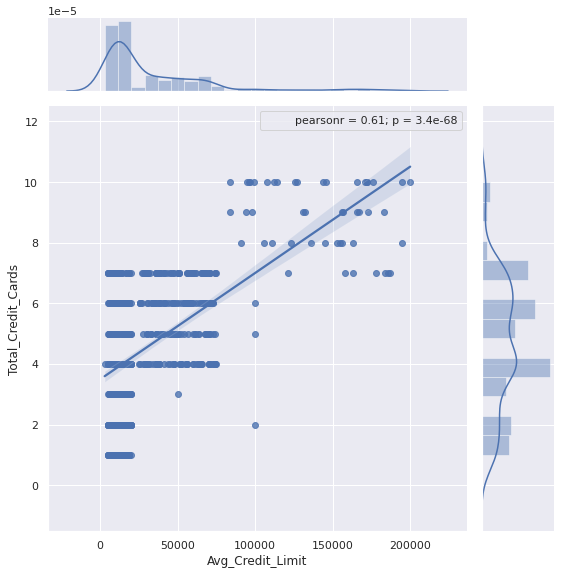

In [56]:
# Plot a linear fuction between Avg_Credit_Limit and Total_Credit_Cards
r1 = sns.jointplot(x= 'Avg_Credit_Limit', y= 'Total_Credit_Cards', data=pdata, kind="reg", height=8)
r1.annotate(stats.pearsonr)
plt.show()

### OLS regression model

In [57]:
# OLS regression model
expr = 'Total_Credit_Cards ~ Avg_Credit_Limit' # create a regression expression in 'patsy' syntax.
olsr_results = smf.ols(expr, cleaned_df).fit()         # configure the OLS regression model by passing the model expression, and train the model on the data set, all in one step
print(olsr_results.summary())                  # print the model summary

                            OLS Regression Results                            
Dep. Variable:     Total_Credit_Cards   R-squared:                       0.372
Model:                            OLS   Adj. R-squared:                  0.371
Method:                 Least Squares   F-statistic:                     387.4
Date:                Sun, 12 Jul 2020   Prob (F-statistic):           4.53e-68
Time:                        13:08:12   Log-Likelihood:                -1284.1
No. Observations:                 655   AIC:                             2572.
Df Residuals:                     653   BIC:                             2581.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            3.4917      0.091  

In [58]:
name = ['Omnibus K-squared test', 'Chi-squared(2) p-value']
#Pass the residual errors of the regression into the test
test = sms.omni_normtest(olsr_results.resid)
lzip(name, test)

[('Omnibus K-squared test', 52.32544236779597),
 ('Chi-squared(2) p-value', 4.3418474272949874e-12)]

In [59]:
name = ['Jarque-Bera test', 'Chi-squared(2) p-value', 'Skewness', 'Kurtosis']
test = sms.jarque_bera(olsr_results.resid)
lzip(name, test)

[('Jarque-Bera test', 17.59383487375373),
 ('Chi-squared(2) p-value', 0.0001511984361981939),
 ('Skewness', -0.023527359984229324),
 ('Kurtosis', 2.198473049887711)]

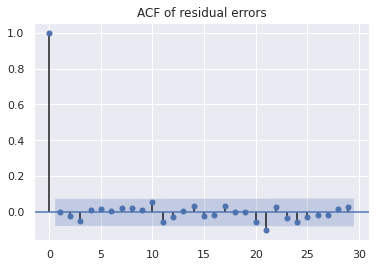

In [60]:
plot_acf(olsr_results.resid, title= 'ACF of residual errors')
plt.show()

## 2. Preprocessing

In [61]:
# Drop any unused column ('Sl_No' and 'Customer Key') from Dataframe
df = cleaned_df.drop(['Customer Key'], axis= 1)
cleaned_df = cleaned_df.drop(['Customer Key'], axis= 1)
df.shape

(655, 5)

### 2.1 Standarlization or Normalization

#### 2.1.1 Standart Scaler

In [62]:
# Build a Standart Scaler model
scaler1 = StandardScaler()

# Fit and Transform the Dataset
df_std = scaler1.fit_transform(df)

The optimal number of PCAs is: 4


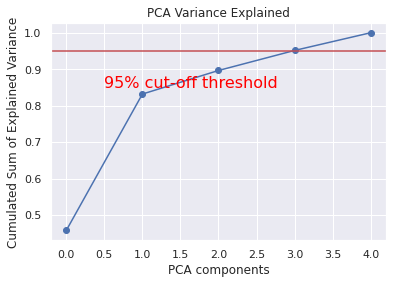

In [63]:
# Find the optimal number of PCA 
pca = PCA(n_components=df_std.shape[1])
pca.fit(df_std)
ratios = pca.explained_variance_ratio_

# Plot the explained variance ratios
x = np.arange(df_std.shape[1])
plt.plot(x, np.cumsum(ratios), '-o')
plt.xlabel('PCA components')
plt.ylabel('Cumulated Sum of Explained Variance')
plt.title('PCA Variance Explained')

# Plot the 95% cut-off threshold
plt.axhline(y=0.95, color='r', linestyle='-')
plt.text(0.5, 0.85, '95% cut-off threshold', color = 'red', fontsize=16)

# Find the optimal number of PCA's
for i in range(np.cumsum(ratios).shape[0]):
  if np.cumsum(ratios)[i] >= 0.95:
    num_pca = i + 1
    print('The optimal number of PCAs is: {}'.format(num_pca))
    break
  else:
    continue

#### 2.1.2 MinMax Scaler

In [64]:
# Build a Scaler model
scaler2 = MinMaxScaler()

# Fit and Transform the dataset
df_minmax = scaler2.fit_transform(df)

The optimal number of PCAs is: 4


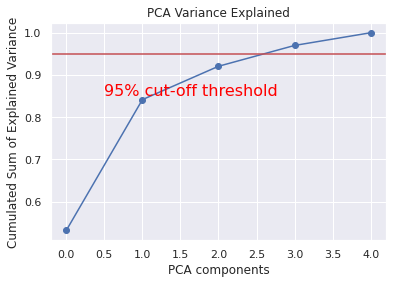

In [65]:
# Find the optimal number of PCA 
pca = PCA(n_components=df_minmax.shape[1])
pca.fit(df_minmax)
ratios = pca.explained_variance_ratio_

# Plot the explained variance ratios
x = np.arange(df_minmax.shape[1])
plt.plot(x, np.cumsum(ratios), '-o')
plt.xlabel('PCA components')
plt.ylabel('Cumulated Sum of Explained Variance')
plt.title('PCA Variance Explained')

# Plot the 95% cut-off threshold
plt.axhline(y=0.95, color='r', linestyle='-')
plt.text(0.5, 0.85, '95% cut-off threshold', color = 'red', fontsize=16)

# Find the optimal number of PCA's
for i in range(np.cumsum(ratios).shape[0]):
  if np.cumsum(ratios)[i] >= 0.95:
    num_pca = i + 1
    print('The optimal number of PCAs is: {}'.format(num_pca))
    break
  else:
    continue

2.1.3 Robust Scaler

In [66]:
# Build a Scaler model
scaler3 = RobustScaler()

# Fit and Transform the dataset
df_robust = scaler3.fit_transform(df)

The optimal number of PCAs is: 4


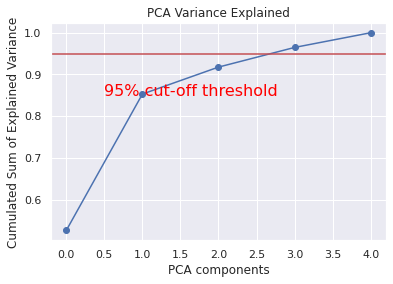

In [67]:
# Find the optimal number of PCA 
pca = PCA(n_components=df_robust.shape[1])
pca.fit(df_robust)
ratios = pca.explained_variance_ratio_


# Plot the explained variance ratios
x = np.arange(df_robust.shape[1])
plt.plot(x, np.cumsum(ratios), '-o')
plt.xlabel('PCA components')
plt.ylabel('Cumulated Sum of Explained Variance')
plt.title('PCA Variance Explained')

# Plot the 95% cut-off threshold
plt.axhline(y=0.95, color='r', linestyle='-')
plt.text(0.5, 0.85, '95% cut-off threshold', color = 'red', fontsize=16)

# Find the optimal number of PCA's
for i in range(np.cumsum(ratios).shape[0]):
  if np.cumsum(ratios)[i] >= 0.95:
    num_pca = i + 1
    print('The optimal number of PCAs is: {}'.format(num_pca))
    break
  else:
    continue

## **CONCLUSION:**
## MinMax Scaler and PCA with 4 components has the best results

### 2.2 PCA as dimensionality reduction

In [68]:
# Build a Optimized PCA fuction
pca = PCA(n_components= 4)

# Fit and Transform the dataset
df_std_pca = pca.fit_transform(df_std)
df_minmax_pca = pca.fit_transform(df_minmax)

# Print the dimensionality reduction
print("original shape:   ", df_minmax.shape)
print("transformed shape:", df_minmax_pca.shape)

original shape:    (655, 5)
transformed shape: (655, 4)


### 2.3 Explained Variance Ratio Table

In [69]:
pca=PCA()  

pca.n_components= 4 

pca_data=pca.fit_transform(df_minmax)

# look at explainded variance of PCA components 
exp_var_cumsum=pd.Series(np.round(pca.explained_variance_ratio_.cumsum(),4)*100)  
for index,var in enumerate(exp_var_cumsum):  
    print('if n_components= {},   variance= {:.2f}'.format(index + 1,np.round(var,3)))

if n_components= 1,   variance= 53.20
if n_components= 2,   variance= 84.16
if n_components= 3,   variance= 92.06
if n_components= 4,   variance= 96.99


### 2.4 Passing 95% Variance as input parameter to PCA function

In [70]:
#Let's say you would like to explain 95% variance  
pca=PCA(.95)  
pca.fit(df_minmax)  
print('Number of components to explain 95% Variance is {}'.format(pca.n_components_))

Number of components to explain 95% Variance is 4


### 2.5 Interpreting the components

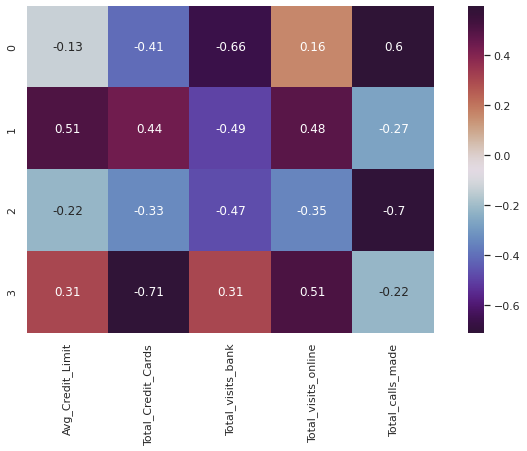

In [71]:
# Map the correlation between the variables and the principal components.
map= pd.DataFrame(pca.components_, columns= df.columns)

plt.figure(figsize=(12, 6))
sns.heatmap(map, square= True, annot= True, cmap= 'twilight_shifted');

## 3. Clustering with K-Means

### 3.1 The Elbow Method

**The elbow method**  estimates a k number of clusters based on the sum of squared distance (SSE) or the average distorion between data points and the assigned clusters’ centroids.

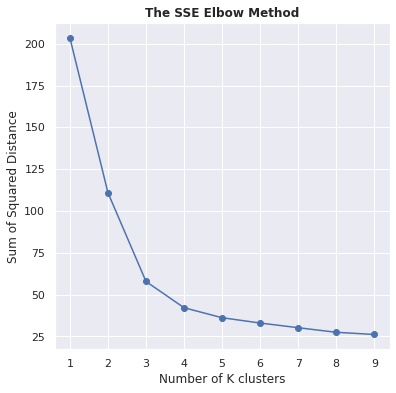

In [72]:
#Finding the optimal no. of K clusters using sum of squared distance (SSE)

kcluster = list(range(1, 10))
sse = []

for k in kcluster:
    kmeans = KMeans(n_clusters= k)
    kmeans.fit(df_minmax_pca)
    sse.append(kmeans.inertia_)

# Plot SSE against K
plt.figure(figsize=(6, 6))
plt.plot(kcluster, sse, '-o')
plt.xlabel(r'Number of K clusters')
plt.ylabel('Sum of Squared Distance')
plt.title('The SSE Elbow Method', fontweight='bold')
plt.show()

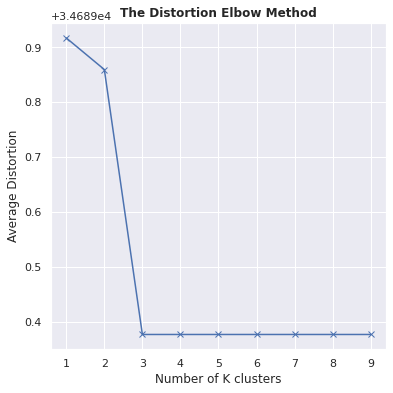

In [73]:
#Finding the optimal no. of K clusters using Mean Distortion

kclusters=range(1,10)
distortions=[]

for k in kclusters:
    model= KMeans(n_clusters=k)
    model.fit(df_minmax)
    prediction= model.predict(df_minmax)
    distortions.append(sum(np.min(cdist(df, model.cluster_centers_, 'euclidean'), axis= 1)) / df_minmax.shape[0])

plt.figure(figsize=(6, 6))
plt.plot(kclusters, distortions, 'bx-')
plt.xlabel(r'Number of K clusters')
plt.ylabel('Average Distortion')
plt.title('The Distortion Elbow Method', fontweight='bold')
plt.show()

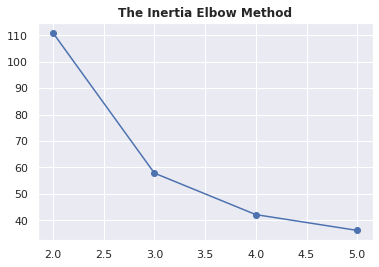

In [74]:
clusters_range = [2,3,4,5]
inertias =[]
for c in clusters_range:
    kmeans = KMeans(n_clusters=c, random_state=0).fit(df_minmax_pca)
    inertias.append(kmeans.inertia_)
plt.figure()
plt.title('The Inertia Elbow Method', fontweight='bold')
plt.plot(clusters_range,inertias, marker='o');

### 3.2 The Silhouette Coefficient Method

**Silhouette analysis** determine the degree of separation between clusters, computing the average distance from all data points in the same cluster (ai) and the average distance from all data points in the closest cluster (bi). Both (ai) and (bi) coefficients can take values between -1 and 1.

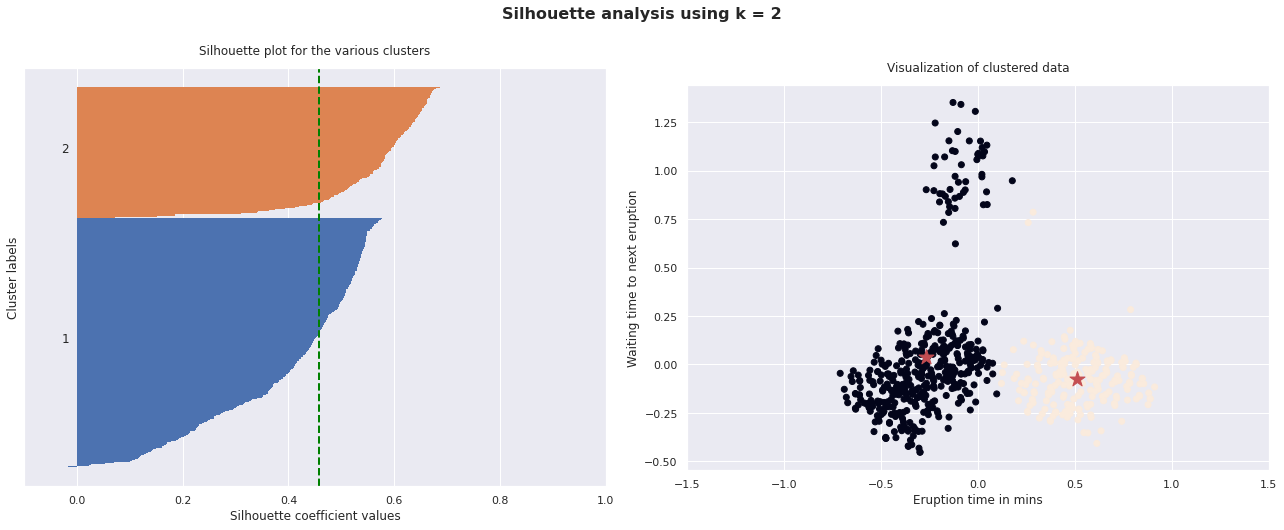

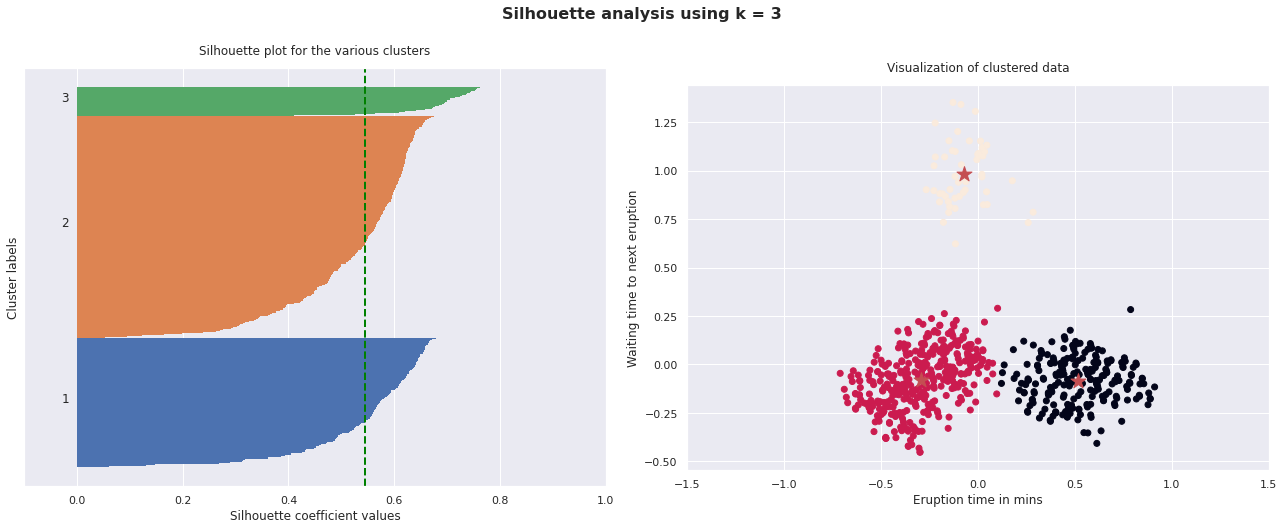

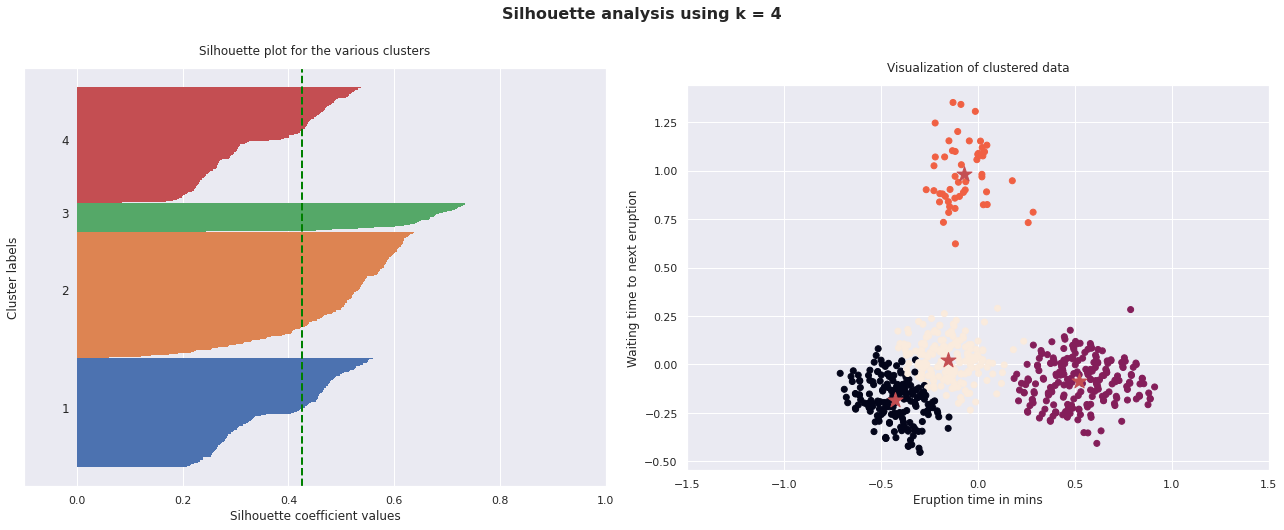

In [75]:
for i, k in enumerate([2, 3, 4]):
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)
    
    # Run the Kmeans algorithm
    kmeans = KMeans(n_clusters=k)
    labels = kmeans.fit_predict(df_minmax_pca)
    centroids = kmeans.cluster_centers_

    # Get silhouette samples
    silhouette_vals = silhouette_samples(df_minmax_pca, labels)

    # Silhouette plot
    y_ticks = []
    y_lower, y_upper = 0, 0
    for i, cluster in enumerate(np.unique(labels)):
        cluster_silhouette_vals = silhouette_vals[labels == cluster]
        cluster_silhouette_vals.sort()
        y_upper += len(cluster_silhouette_vals)
        ax1.barh(range(y_lower, y_upper), cluster_silhouette_vals, edgecolor='none', height=1)
        ax1.text(-0.03, (y_lower + y_upper) / 2, str(i + 1))
        y_lower += len(cluster_silhouette_vals)

    # Get the average silhouette score and plot it
    avg_score = np.mean(silhouette_vals)
    ax1.axvline(avg_score, linestyle='--', linewidth=2, color='green')
    ax1.set_yticks([])
    ax1.set_xlim([-0.1, 1])
    ax1.set_xlabel('Silhouette coefficient values')
    ax1.set_ylabel('Cluster labels')
    ax1.set_title('Silhouette plot for the various clusters', y=1.02);
    
    # Scatter plot of data colored with labels
    ax2.scatter(df_minmax_pca[:, 0], df_minmax_pca[:, 1], c= labels)
    ax2.scatter(centroids[:, 0], centroids[:, 1], marker='*', c='r', s=250)
    ax2.set_xlim([-1.5, 1.5])
    ax2.set_xlim([-1.5, 1.5])
    ax2.set_xlabel('Eruption time in mins')
    ax2.set_ylabel('Waiting time to next eruption')
    ax2.set_title('Visualization of clustered data', y=1.02)
    ax2.set_aspect('equal')
    plt.tight_layout()
    plt.suptitle(f'Silhouette analysis using k = {k}', fontsize=16, fontweight='semibold', y=1.05);


### Silhouette Score Method

In [76]:
# The silhouette_score gives the average value for all the samples.
# This gives a perspective into the density and separation of the formed
# clusters

range_n_clusters = [2, 3, 4, 5, 6]

for n_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=n_clusters)
    preds = kmeans.fit_predict(df_minmax_pca)
    centers = kmeans.cluster_centers_

    score = silhouette_score(df, preds)
    print("For the number of K clusters= {}, the silhouette score is {:.2f}".format(n_clusters, score))

For the number of K clusters= 2, the silhouette score is 0.10
For the number of K clusters= 3, the silhouette score is 0.19
For the number of K clusters= 4, the silhouette score is 0.09
For the number of K clusters= 5, the silhouette score is -0.16
For the number of K clusters= 6, the silhouette score is -0.17


#### **Conclusion:**
#### The optimized number of K cluster is 3.

In [77]:
# Creating the clusters based in k=3

kmeans = KMeans(n_clusters=3, random_state= 42)
df_minmax_pca_clustered = kmeans.fit_transform(df_minmax_pca)

print(df_minmax_pca.shape)
print(df_minmax_pca_clustered.shape)

(655, 4)
(655, 3)


In [78]:
# Check the number of data in each cluster

labels = kmeans.labels_
counts = np.bincount(labels[labels>=0])
print(counts)

[ 50 382 223]


In [79]:
# Run local implementation of kmeans
kmeans = KMeans(n_clusters= 3, init= 'k-means++', max_iter= 300, random_state= 42)
df_minmax_pca_km = kmeans.fit(df_minmax_pca)
centroids = kmeans.cluster_centers_

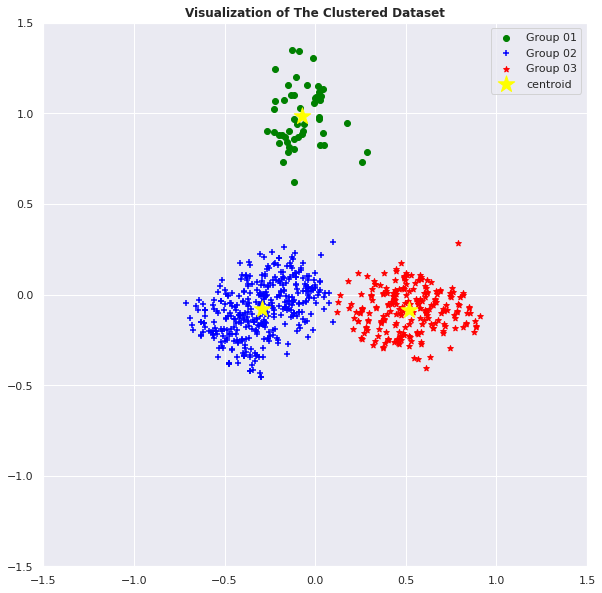

In [80]:
# Plot the clustered data
fig, ax = plt.subplots(figsize=(10, 10))
plt.scatter(df_minmax_pca[kmeans.labels_ == 0, 0], df_minmax_pca[kmeans.labels_ == 0, 1],
            marker='o', c='green', label='Group 01')
plt.scatter(df_minmax_pca[kmeans.labels_ == 1, 0], df_minmax_pca[kmeans.labels_ == 1, 1],
            marker='+', c='blue', label='Group 02')
plt.scatter(df_minmax_pca[kmeans.labels_ == 2, 0], df_minmax_pca[kmeans.labels_ == 2, 1],
            marker='*', c='red', label='Group 03')
plt.scatter(centroids[:, 0], centroids[:, 1], marker='*', s=300,
            c='yellow', label='centroid')
plt.legend()
plt.xlim([-1.5, 1.5])
plt.ylim([-1.5, 1.5])
plt.title('Visualization of The Clustered Dataset', fontweight='bold')
ax.set_aspect('equal');

In [81]:
# KMeans optimal configuration
df_minmax_pca_km

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=42, tol=0.0001, verbose=0)

## 4. Hierarchical Clustering Model:

Hierarchical clustering can be divided into two main types: agglomerative and divisive.

1 - **Agglomerative clustering:** It’s also known as AGNES (Agglomerative Nesting). It works in a bottom-up manner. That is, each object is initially considered as a single-element cluster (leaf). At each step of the algorithm, the two clusters that are the most similar are combined into a new bigger cluster (nodes). This procedure is iterated until all points are member of just one single big cluster (root) (see figure below). The result is a tree which can be plotted as a dendrogram.

2 - **Divisive hierarchical clustering:** It’s also known as DIANA (Divise Analysis) and it works in a top-down manner. The algorithm is an inverse order of AGNES. It begins with the root, in which all objects are included in a single cluster. At each step of iteration, the most heterogeneous cluster is divided into two. The process is iterated until all objects are in their own cluster (see figure below).

Note that agglomerative clustering is good at identifying small clusters. Divisive hierarchical clustering is good at identifying large clusters.

### 4.1 Dendrogram

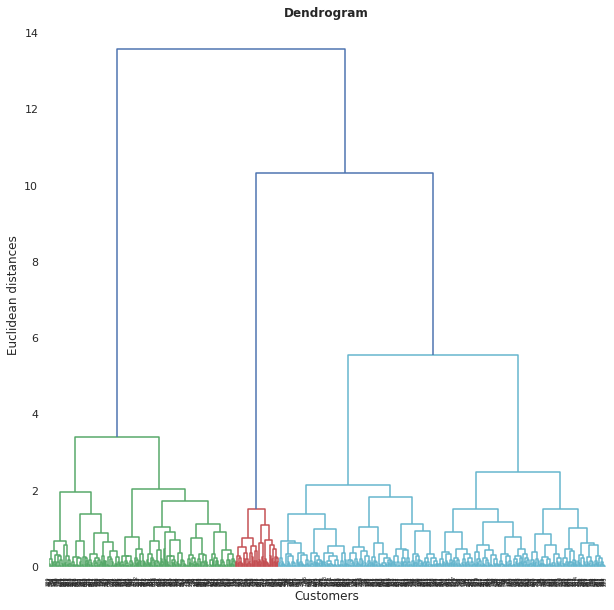

In [82]:
# Plot the dendrogram to find the optimal numbers of clusters. 
plt.figure(figsize=(10, 10))
dendrogram = sch.dendrogram(sch.linkage(df_minmax_pca, method= "ward"))
plt.title('Dendrogram', fontweight='bold')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()

### 4.1.2 Interative Dendrogram using Ploty

In [83]:
import plotly.figure_factory as ff

fig = ff.create_dendrogram(df_minmax_pca, color_threshold=1.5)
fig.update_layout(width=800, height=500)
fig.show()

### 4.2 Differents "Linkage Methods" Dendrograms

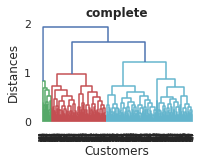

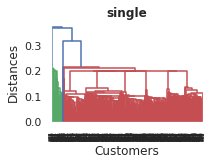

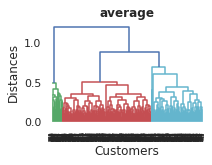

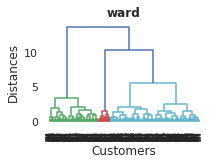

In [84]:
method_list= ['complete', 'single', 'average', 'ward']

count = 1
for i in method_list:
    plt.subplot(2, 2, count)
    dendrogram = sch.dendrogram(sch.linkage(df_minmax_pca, method= i))
    plt.title(i, fontweight='bold')
    plt.xlabel('Customers')
    plt.ylabel('Distances')
    plt.show()
    count += 1 

### 4.3 Differents 'Metrics' Effect

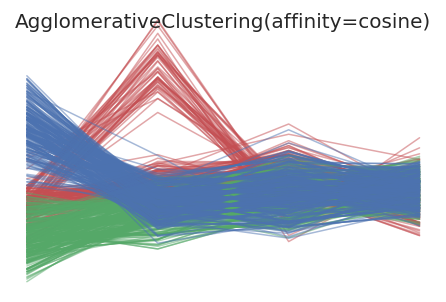

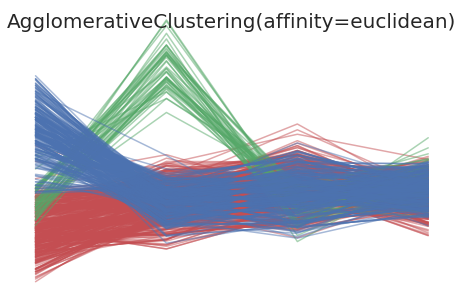

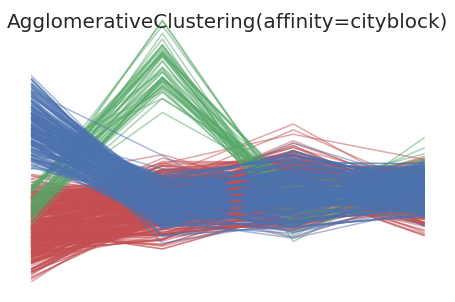

In [85]:
# Plot clustering results
for index, metric in enumerate(['cosine', 'euclidean', 'cityblock']):
    model = AgglomerativeClustering(n_clusters= 3,
                                    linkage= 'complete', affinity= metric)
    model.fit(df_minmax_pca)
    plt.figure()
    plt.axes([0, 0, 1, 1])
    for l, c in zip(np.arange(model.n_clusters), 'rgbk'):
        plt.plot(df_minmax_pca[model.labels_ == l].T, c=c, alpha=.5)
    plt.axis('tight')
    plt.axis('off')
    plt.suptitle('AgglomerativeClustering(affinity=%s)' % metric, size=20)
plt.show()

 4.4 Cophenetic Correlation Coefficient using SCIPY

In [86]:
from scipy.cluster.hierarchy import cophenet
from scipy.spatial.distance import pdist

X= df_minmax_pca

# generate the linkage matrix
Z= linkage(X, method='ward', metric='euclidean')

# calculate  the Cophenetic Correlation Coefficient
c, coph_dists = cophenet(Z, pdist(X))
c

0.7658492690633762

In [87]:
# generate the linkage matrix
Z= linkage(X, method='single', metric='euclidean')

# calculate  the Cophenetic Correlation Coefficient
c, coph_dists = cophenet(Z, pdist(X))
c

0.6483013768095722

In [88]:
# generate the linkage matrix
Z= linkage(X, method='median', metric='euclidean')

# calculate  the Cophenetic Correlation Coefficient
c, coph_dists = cophenet(Z, pdist(X))
c

0.8016652843850466

In [89]:
# generate the linkage matrix
Z= linkage(X, method='complete', metric='euclidean')

# calculate  the Cophenetic Correlation Coefficient
c, coph_dists = cophenet(Z, pdist(X))
c

0.8035881411581421

In [90]:
# generate the linkage matrix
Z= linkage(X, method='weighted', metric='euclidean')

# calculate  the Cophenetic Correlation Coefficient
c, coph_dists = cophenet(Z, pdist(X))
c

0.8426058663219006

In [91]:
# generate the linkage matrix
Z= linkage(X, method='centroid', metric='euclidean')

# calculate  the Cophenetic Correlation Coefficient
c, coph_dists = cophenet(Z, pdist(X))
c

0.8548092852089408

In [92]:
# generate the linkage matrix
Z= linkage(X, method='average', metric='euclidean')

# calculate  the Cophenetic Correlation Coefficient
c, coph_dists = cophenet(Z, pdist(X))
c

0.8596890027564872

In [93]:
# generate the linkage matrix
Z= linkage(X, method='average', metric='cosine')

# calculate  the Cophenetic Correlation Coefficient
c, coph_dists = cophenet(Z, pdist(X))
c

0.7279876968990214

In [94]:
# generate the linkage matrix
Z= linkage(X, method='average', metric='cityblock')

# calculate  the Cophenetic Correlation Coefficient
c, coph_dists = cophenet(Z, pdist(X))
c

0.8533485166025312

### **Conclusion:**
The optimal model for Hierarquical Clustering method is 'average' with 'euclidian' metric

### 4.5 Optimal Hierarchical Clustering

In [95]:
# Fitting hierarchical clustering to the Dataset
hc = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean', linkage ='average')

df_minmax_pca_hc=hc.fit_predict(df_minmax_pca)

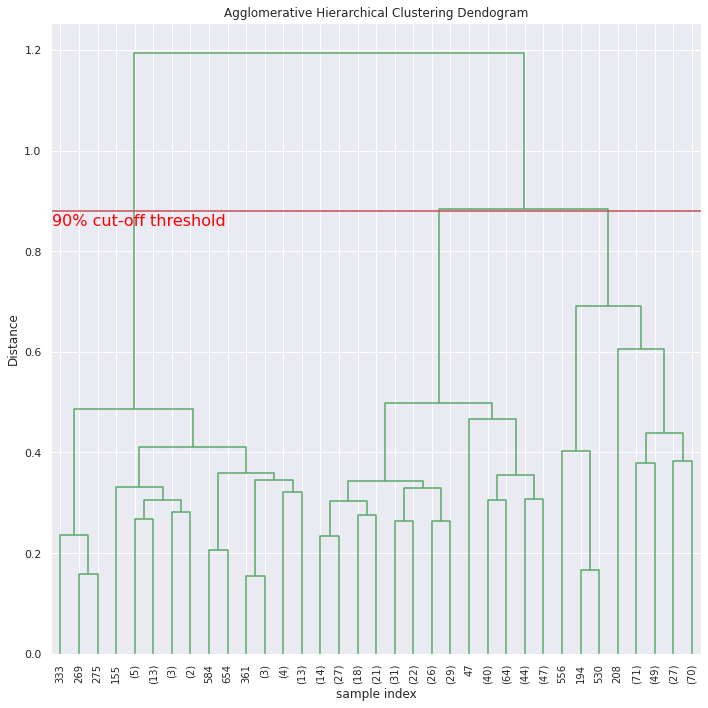

In [96]:
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.spatial.distance import pdist
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 10))
plt.title('Agglomerative Hierarchical Clustering Dendogram')
plt.xlabel('sample index')
plt.ylabel('Distance')
Z= linkage(X, method='average', metric='euclidean')
dendrogram(Z,leaf_rotation=90.0,p=5,color_threshold=52,leaf_font_size=10,truncate_mode='level')
# Plot the 95% cut-off threshold
plt.axhline(y=0.88, color='r', linestyle='-')
plt.text(0.5, 0.85, '90% cut-off threshold', color = 'red', fontsize=16)
plt.tight_layout()

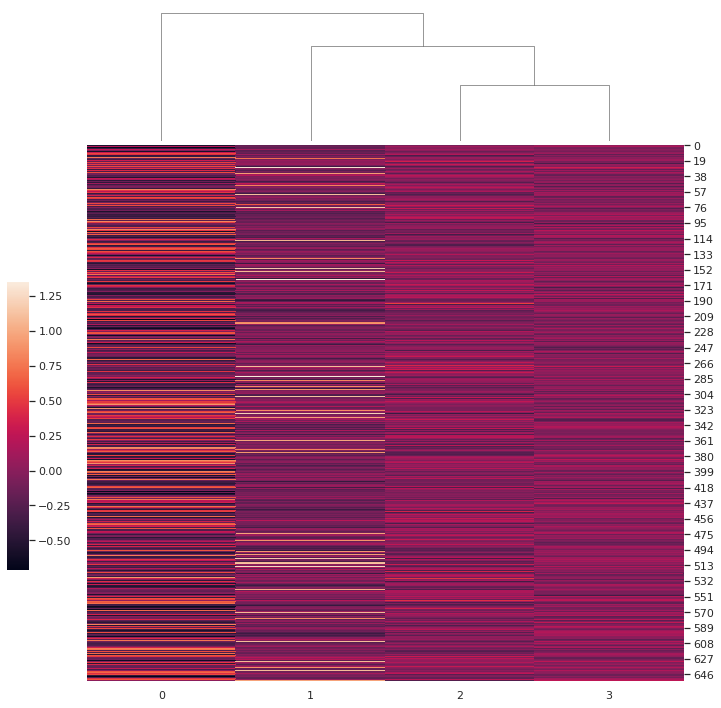

In [97]:
sns.clustermap(df_minmax_pca, figsize=(10, 10), row_cluster=False, dendrogram_ratio=(.1, .2), cbar_pos=(0, .2, .03, .4));

## 5. Calculate the Average Silhouette Score for K-Means and HC

In [98]:
# Calculate average silhouette score for K-Means
kmeans = KMeans(n_clusters= 3, max_iter= 300, random_state= 42)
preds1 = kmeans.fit_predict(df_minmax_pca)
preds2 = kmeans.fit_predict(df_std_pca)
centers = kmeans.cluster_centers_
score1 = silhouette_score(df, preds1)
score2 = silhouette_score(df, preds2)

print("For the optimized K-Means the silhouette score is {:.2f} for MinmaxScale and {:.2F} for StandartScale normalizations".format(score1, score2))

For the optimized K-Means the silhouette score is 0.19 for MinmaxScale and 0.20 for StandartScale normalizations


In [99]:
# Calculate average silhouette score for HC
hc = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean', linkage ='average')
preds1 = hc.fit_predict(df_minmax_pca)
preds2 = hc.fit_predict(df_std_pca)

score1 = silhouette_score(df, preds1)
score2 = silhouette_score(df, preds2)

print("For the optimized K-Means the silhouette score is {:.2f} for MinmaxScale and {:.2F} for StandartScale normalizations".format(score1, score2))

For the optimized K-Means the silhouette score is 0.19 for MinmaxScale and 0.19 for StandartScale normalizations


**Conclusion** 
The Average Slhouette Scores are awya from the optimun 1.0 but the best result is the K-Means in the StandartScaled data

## 6. Compare K-Means and HC

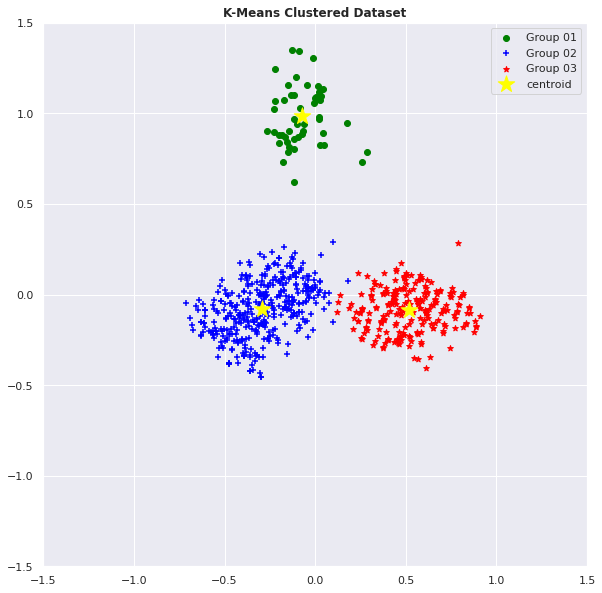

In [100]:
# Plot the clustered data
fig, ax = plt.subplots(figsize=(10, 10))
plt.scatter(df_minmax_pca[kmeans.labels_ == 0, 0], df_minmax_pca[kmeans.labels_ == 0, 1],
            marker='o', c='green', label='Group 01')
plt.scatter(df_minmax_pca[kmeans.labels_ == 1, 0], df_minmax_pca[kmeans.labels_ == 1, 1],
            marker='+', c='blue', label='Group 02')
plt.scatter(df_minmax_pca[kmeans.labels_ == 2, 0], df_minmax_pca[kmeans.labels_ == 2, 1],
            marker='*', c='red', label='Group 03')
plt.scatter(centroids[:, 0], centroids[:, 1], marker='*', s=300,
            c='yellow', label='centroid')
plt.legend()
plt.xlim([-1.5, 1.5])
plt.ylim([-1.5, 1.5])
plt.title('K-Means Clustered Dataset', fontweight='bold')
ax.set_aspect('equal');

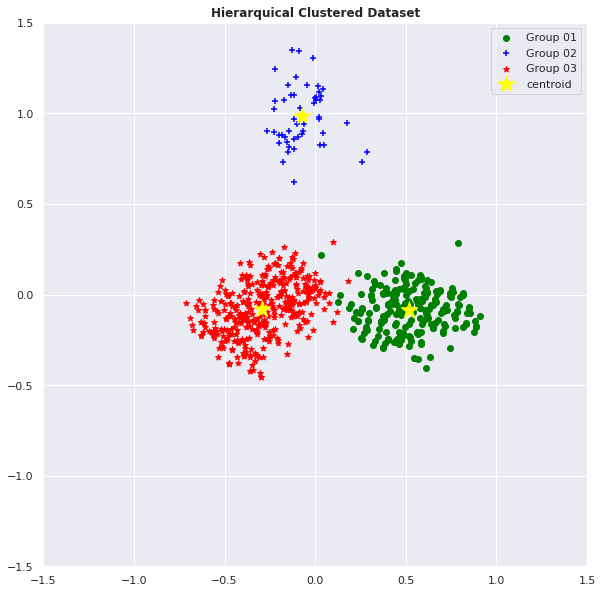

In [101]:
# Plot the clustered data
fig, ax = plt.subplots(figsize=(10, 10))
plt.scatter(df_minmax_pca[hc.labels_ == 0, 0], df_minmax_pca[hc.labels_ == 0, 1],
            marker='o', c='green', label='Group 01')
plt.scatter(df_minmax_pca[hc.labels_ == 1, 0], df_minmax_pca[hc.labels_ == 1, 1],
            marker='+', c='blue', label='Group 02')
plt.scatter(df_minmax_pca[hc.labels_ == 2, 0], df_minmax_pca[hc.labels_ == 2, 1],
            marker='*', c='red', label='Group 03')
plt.scatter(centroids[:, 0], centroids[:, 1], marker='*', s=300,
            c='yellow', label='centroid')
plt.legend()
plt.xlim([-1.5, 1.5])
plt.ylim([-1.5, 1.5])
plt.title('Hierarquical Clustered Dataset', fontweight='bold')
ax.set_aspect('equal');

**Conclusion:**

In the above plots we can see that K-Means has a best classification of the 'distress' data points in the middle of the graph and a little better Silhouette Score

## 7.0 Conclusions:

**StandartScaler:** Standarlization with StandartScaler prove to be one of the top normalization for this dataset and clustering over Minmax Scaler and RobustScaler. 

**PCA: ** "Principal Component Analysis" was useful to pre-processing the datapoints and also to reduce de dimensonality from 5 to 4 for a 99% representative or even to 3 dimensions for a 95% representation of features.

**K-Means** with n_clusters= 3 and using get the best silhouette score for this dataset.

**Hieraquical Clustering** prove to be almost as good as K-Menas using the n_clusters= 3, method= 'average' and dimension= 'euclidian'

In [102]:
# K-Means

kmeans = KMeans(n_clusters= 3, max_iter= 300, random_state= 42)
kmeans.fit(df_std_pca) #K-means training
y_pred = kmeans.predict(df_std_pca)

# Store the K-Means results in a dataframe
pred = pd.DataFrame(y_pred)
pred.columns = ['clusters']

# Merge this dataframe with df
prediction = pd.concat([df,pred], axis = 1)

# Store the clusters
cluster0 = prediction.loc[prediction.clusters == 0]
cluster1 = prediction.loc[prediction.clusters == 1]
cluster2 = prediction.loc[prediction.clusters == 2]
k_list = [cluster0.values, cluster1.values,cluster2.values]

In [103]:
# Splitting the clustering data into Independable and Denpendable Variables
X= cleaned_df
y= pred

print(X.shape)
print(y.shape)

(655, 5)
(655, 1)


In [104]:
# Make an instance of the Decision Tree Model
clf = DecisionTreeClassifier(max_depth = 5, random_state = 0)

# Train the model on the data
clf.fit(X, y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

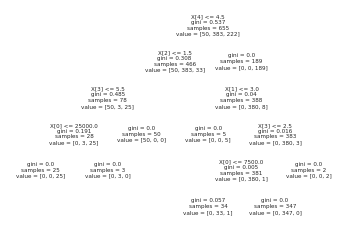

In [105]:
# Plot the decision tree
tree.plot_tree(clf);

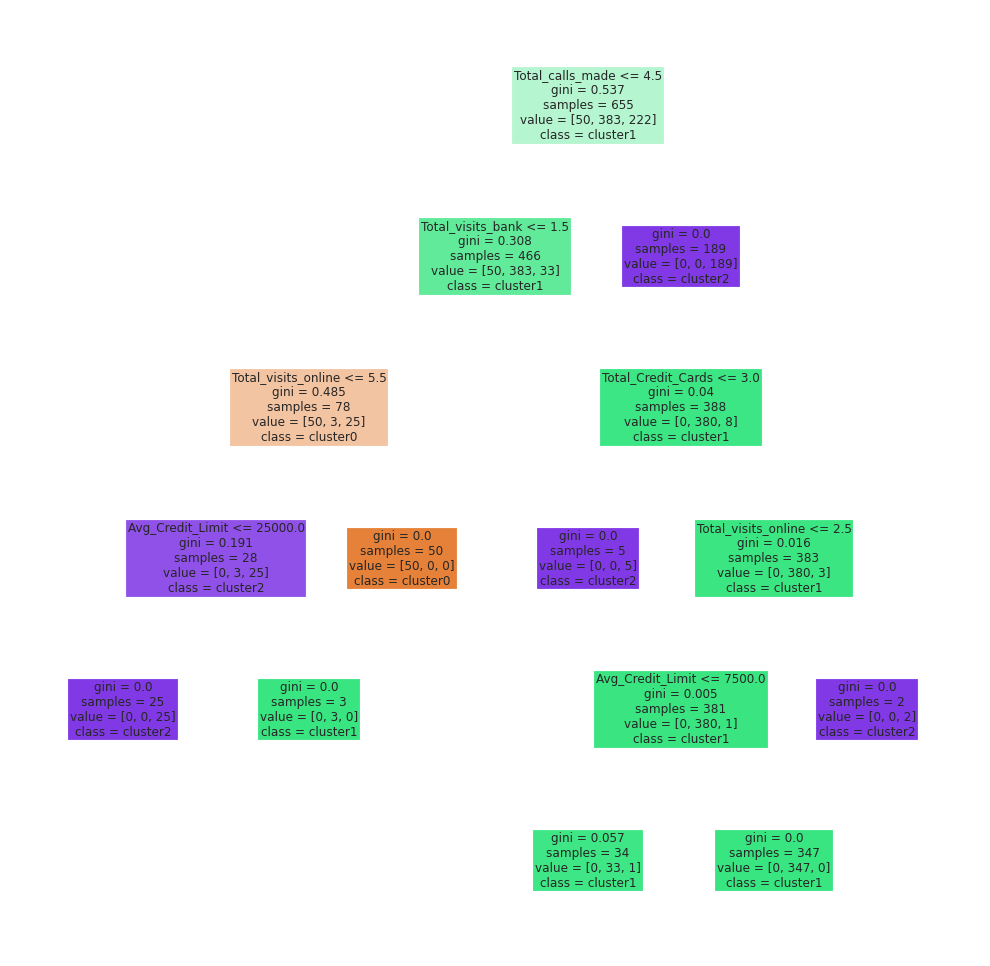

In [106]:
# List all features (dependable variables) and the all clusters (target variable)
fn=['Avg_Credit_Limit',  'Total_Credit_Cards',  'Total_visits_bank',  'Total_visits_online',  'Total_calls_made']
cn=['cluster0', 'cluster1', 'cluster2']

fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(clf,
               feature_names = fn, 
               class_names=cn,
               filled = True);
fig.savefig('imagename.png')

In [107]:
# Export pLot as tree.dot using graphviz
tree.export_graphviz(clf,
                     out_file="tree.dot",
                     feature_names = fn, 
                     class_names=cn,
                     filled = True)

0. **Cluster 0** First branch is *Total_Visits_Online <= 5.5* and second branch is *Avg_Credit_Limit <= 25000* this is the *Premium Customers*

1. **Cluster 1** First branch is *Total_Call_Made <= 4.5* as the middle customers has less calls made. Second branch is *Total_Visits_Bank <= 1.5* and also the third branch is *Total_Credit_Card <= 3.0* and the fifth branch is Avg_Credit_limit <= 7500.00. This is the *Lower Customers*

2. **Cluster 2** First branch is *Total_Visits_Bank > 1.5* and the second branch is *Avg_Credit_Limit <= 25000*. This is the *Middle Customers Clusters*

# Bibliography

1 - Selecting the number of clusters with silhouette analysis on KMeans clustering. https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html#sphx-glr-auto-examples-cluster-plot-kmeans-silhouette-analysis-py

2 - Ronan, T., Anastasio, S., Qi, Z., Tavares, P. H. da S., Sloutsky, R., Naegle K. M. (2018). OpenEnsembles : A Python Resource for Ensemble Clustering.
Journal of Machine Learning Research, 26, 1–6. Paper:  http://jmlr.org/papers/v19/18-100.html

3 - Empirical evaluation of the impact of k-means initialization: https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_stability_low_dim_dense.html

## ** Extra:**

### Empirical evaluation of the impact of k-means initialization

Evaluation of KMeans with k-means++ init
Evaluation of KMeans with random init
Evaluation of MiniBatchKMeans with k-means++ init
Evaluation of MiniBatchKMeans with random init


TypeError: ignored

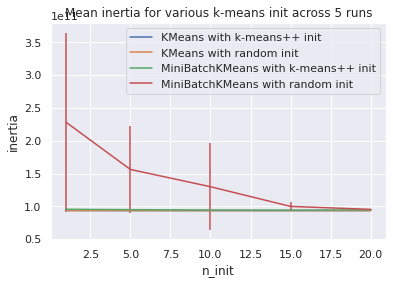

<Figure size 432x288 with 0 Axes>

In [108]:
# Author: Olivier Grisel <olivier.grisel@ensta.org>
# License: BSD 3 clause

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm

from sklearn.utils import shuffle
from sklearn.utils import check_random_state
from sklearn.cluster import MiniBatchKMeans
from sklearn.cluster import KMeans

n_clusters = 3
random_state = np.random.RandomState(0)


# Number of run (with randomly generated dataset) for each strategy so as
# to be able to compute an estimate of the standard deviation
n_runs = 5

# k-means models can do several random inits so as to be able to trade
# CPU time for convergence robustness
n_init_range = np.array([1, 5, 10, 15, 20])

# Part 1: Quantitative evaluation of various init methods

plt.figure()
plots = []
legends = []

cases = [
    (KMeans, 'k-means++', {}),
    (KMeans, 'random', {}),
    (MiniBatchKMeans, 'k-means++', {'max_no_improvement': 3}),
    (MiniBatchKMeans, 'random', {'max_no_improvement': 3, 'init_size': 500}),
]

for factory, init, params in cases:
    print("Evaluation of %s with %s init" % (factory.__name__, init))
    inertia = np.empty((len(n_init_range), n_runs))

    for run_id in range(n_runs):

        for i, n_init in enumerate(n_init_range):
            km = factory(n_clusters=n_clusters, init=init, random_state=run_id,
                         n_init=n_init, **params).fit(X)
            inertia[i, run_id] = km.inertia_
    p = plt.errorbar(n_init_range, inertia.mean(axis=1), inertia.std(axis=1))
    plots.append(p[0])
    legends.append("%s with %s init" % (factory.__name__, init))

plt.xlabel('n_init')
plt.ylabel('inertia')
plt.legend(plots, legends)
plt.title("Mean inertia for various k-means init across %d runs" % n_runs)

# Part 2: Qualitative visual inspection of the convergence

km = MiniBatchKMeans(n_clusters=n_clusters, init='random', n_init=1,
                     random_state=random_state).fit(X)

plt.figure()
for k in range(n_clusters):
    my_members = km.labels_ == k
    color = cm.nipy_spectral(float(k) / n_clusters, 1)
    plt.plot(X[my_members, 0], X[my_members, 1], 'o', marker='.', c=color)
    cluster_center = km.cluster_centers_[k]
    plt.plot(cluster_center[0], cluster_center[1], 'o',
             markerfacecolor=color, markeredgecolor='k', markersize=6)
    plt.title("Example cluster allocation with a single random init\n"
              "with MiniBatchKMeans")

plt.show()